## Black Friday dataset EDA and Feature Engineering

In [1]:
# importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

PATH = r'/Users/pan/desktop/data-science/eda/black-friday/dataset/' 

<h2>Problem Statement</h2><br>

<div style="font-size:16px;"> A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.<br>

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.</div>

In [2]:
# read the training dataset
df_train = pd.read_csv(PATH + 'black-friday-train-dataset.csv')
df_train.shape

(550068, 12)

In [3]:
# read the test dataset
df_test = pd.read_csv(PATH + 'black-friday-test-dataset.csv')
df_test.shape

(233599, 11)

### now our task is to combine both data for pre-processing

In [4]:
df_test.shape

(233599, 11)

In [5]:
df_train.shape

(550068, 12)

In [6]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
# merge isn't a good option here
# df = df_train.append(df_test)
# df.shape

In [8]:
# here, we have combined both dataset and test dataset is below the train dataset
# means, last records belong to test dataset and some top records belong to train dataset
df = pd.concat((df_train, df_test))
df.shape

(783667, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
# So, we are getting lots of null values at last because test dataset only contain 11 columns
# and train dataset contain 12 columns.
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

### now, remove all the unnecessary columns from the dataset

In [11]:
df.head(8)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0


In [12]:
# let's remove userid from here
df.drop(columns=['User_ID'], axis=1, inplace=True)

In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Handling the categorical features

1. Gender: convert it to 0 and 1 (in numerical format)
2. Age: convert it in numerical format
3. City_Category

In [14]:
# Handling the Gender categorical features
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df.head(30)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,1,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,1,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,1,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,1,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [15]:
# Handling the Age categorical features
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
# # we can also handle this dataset using explicit functions
# def map_age(age):
#     if age == '0-17':
#         return 1
#     elif age == '18-25':
#         return 2
#     elif age == '26-35':
#         return 3
#     elif age == '36-45':
#         return 4
#     elif age == '46-50':
#         return 5
#     elif age == '51-55':
#         return 6
#     elif age == '55+':
#         return 7
# df['Age'] = df['Age'].apply(map_age)

In [17]:
# now convert it in numerical format by labelling 1 to 7 in ascending order
df['Age'] = df['Age'].map({'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})
df.head(30)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,1,3,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,1,5,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1,5,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,1,5,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,1,3,20,A,1,1,8,NaN,NaN,7871.0


In [18]:
# handline city category
# here, we have dropped the first category because two categories are sufficient to describe three categories
# if (B: 0, C: 0 means city: A) or (B: 1 means city: B) or (C: 1 means city: C)
df_city = pd.get_dummies(df['City_Category'], drop_first=True)

# now combine it with dataset
df = pd.concat((df, df_city), axis=1)

# also remove the city category columns
df.drop(columns=['City_Category'], axis=1, inplace=True)
df.head(10)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1
5,P00193542,1,3,15,3,0,1,2.0,NaN,15227.0,0,0
6,P00184942,1,5,7,2,1,1,8.0,17.0,19215.0,1,0
7,P00346142,1,5,7,2,1,1,15.0,NaN,15854.0,1,0
8,P0097242,1,5,7,2,1,1,16.0,NaN,15686.0,1,0
9,P00274942,1,3,20,1,1,8,NaN,NaN,7871.0,0,0


In [19]:
# now, handling the missing value
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [20]:
## here, we will focus on cat1 and cat2, and try to replace the missing values
## w.r.t. any categorical feature or discrete feature, we should use mode.
"""mode: (The mode is the most commonly occurring data point in a dataset. 
The mode is useful when there are a lot of repeated values in a dataset. 
There can be no mode, one mode, or multiple modes in a dataset.)"""
mode_product_category_2 = df['Product_Category_2'].mode()
mode_product_category_2

0    8.0
Name: Product_Category_2, dtype: float64

In [21]:
mode_product_category_3 = df['Product_Category_3'].mode()
mode_product_category_3

0    16.0
Name: Product_Category_3, dtype: float64

In [22]:
# filled missing values
df['Product_Category_3'] = df['Product_Category_3'].fillna(mode_product_category_3[0])
df['Product_Category_3'].isnull().sum()

0

In [23]:
# missing values filled by mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(mode_product_category_2[0])
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [24]:
# now handle Stay_In_Current_City_Years because it is also a categorical feature
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [25]:
# making Stay_In_Current_City_Years as numerical
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4})

# or we can simply remove the '+' symbol from the column
# df['Stay_In_Current_City_Years'].str.replace('4+', '4')



df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


In [32]:
# convert object as integer "____if needed____"
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


### visualization

/Users/pan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

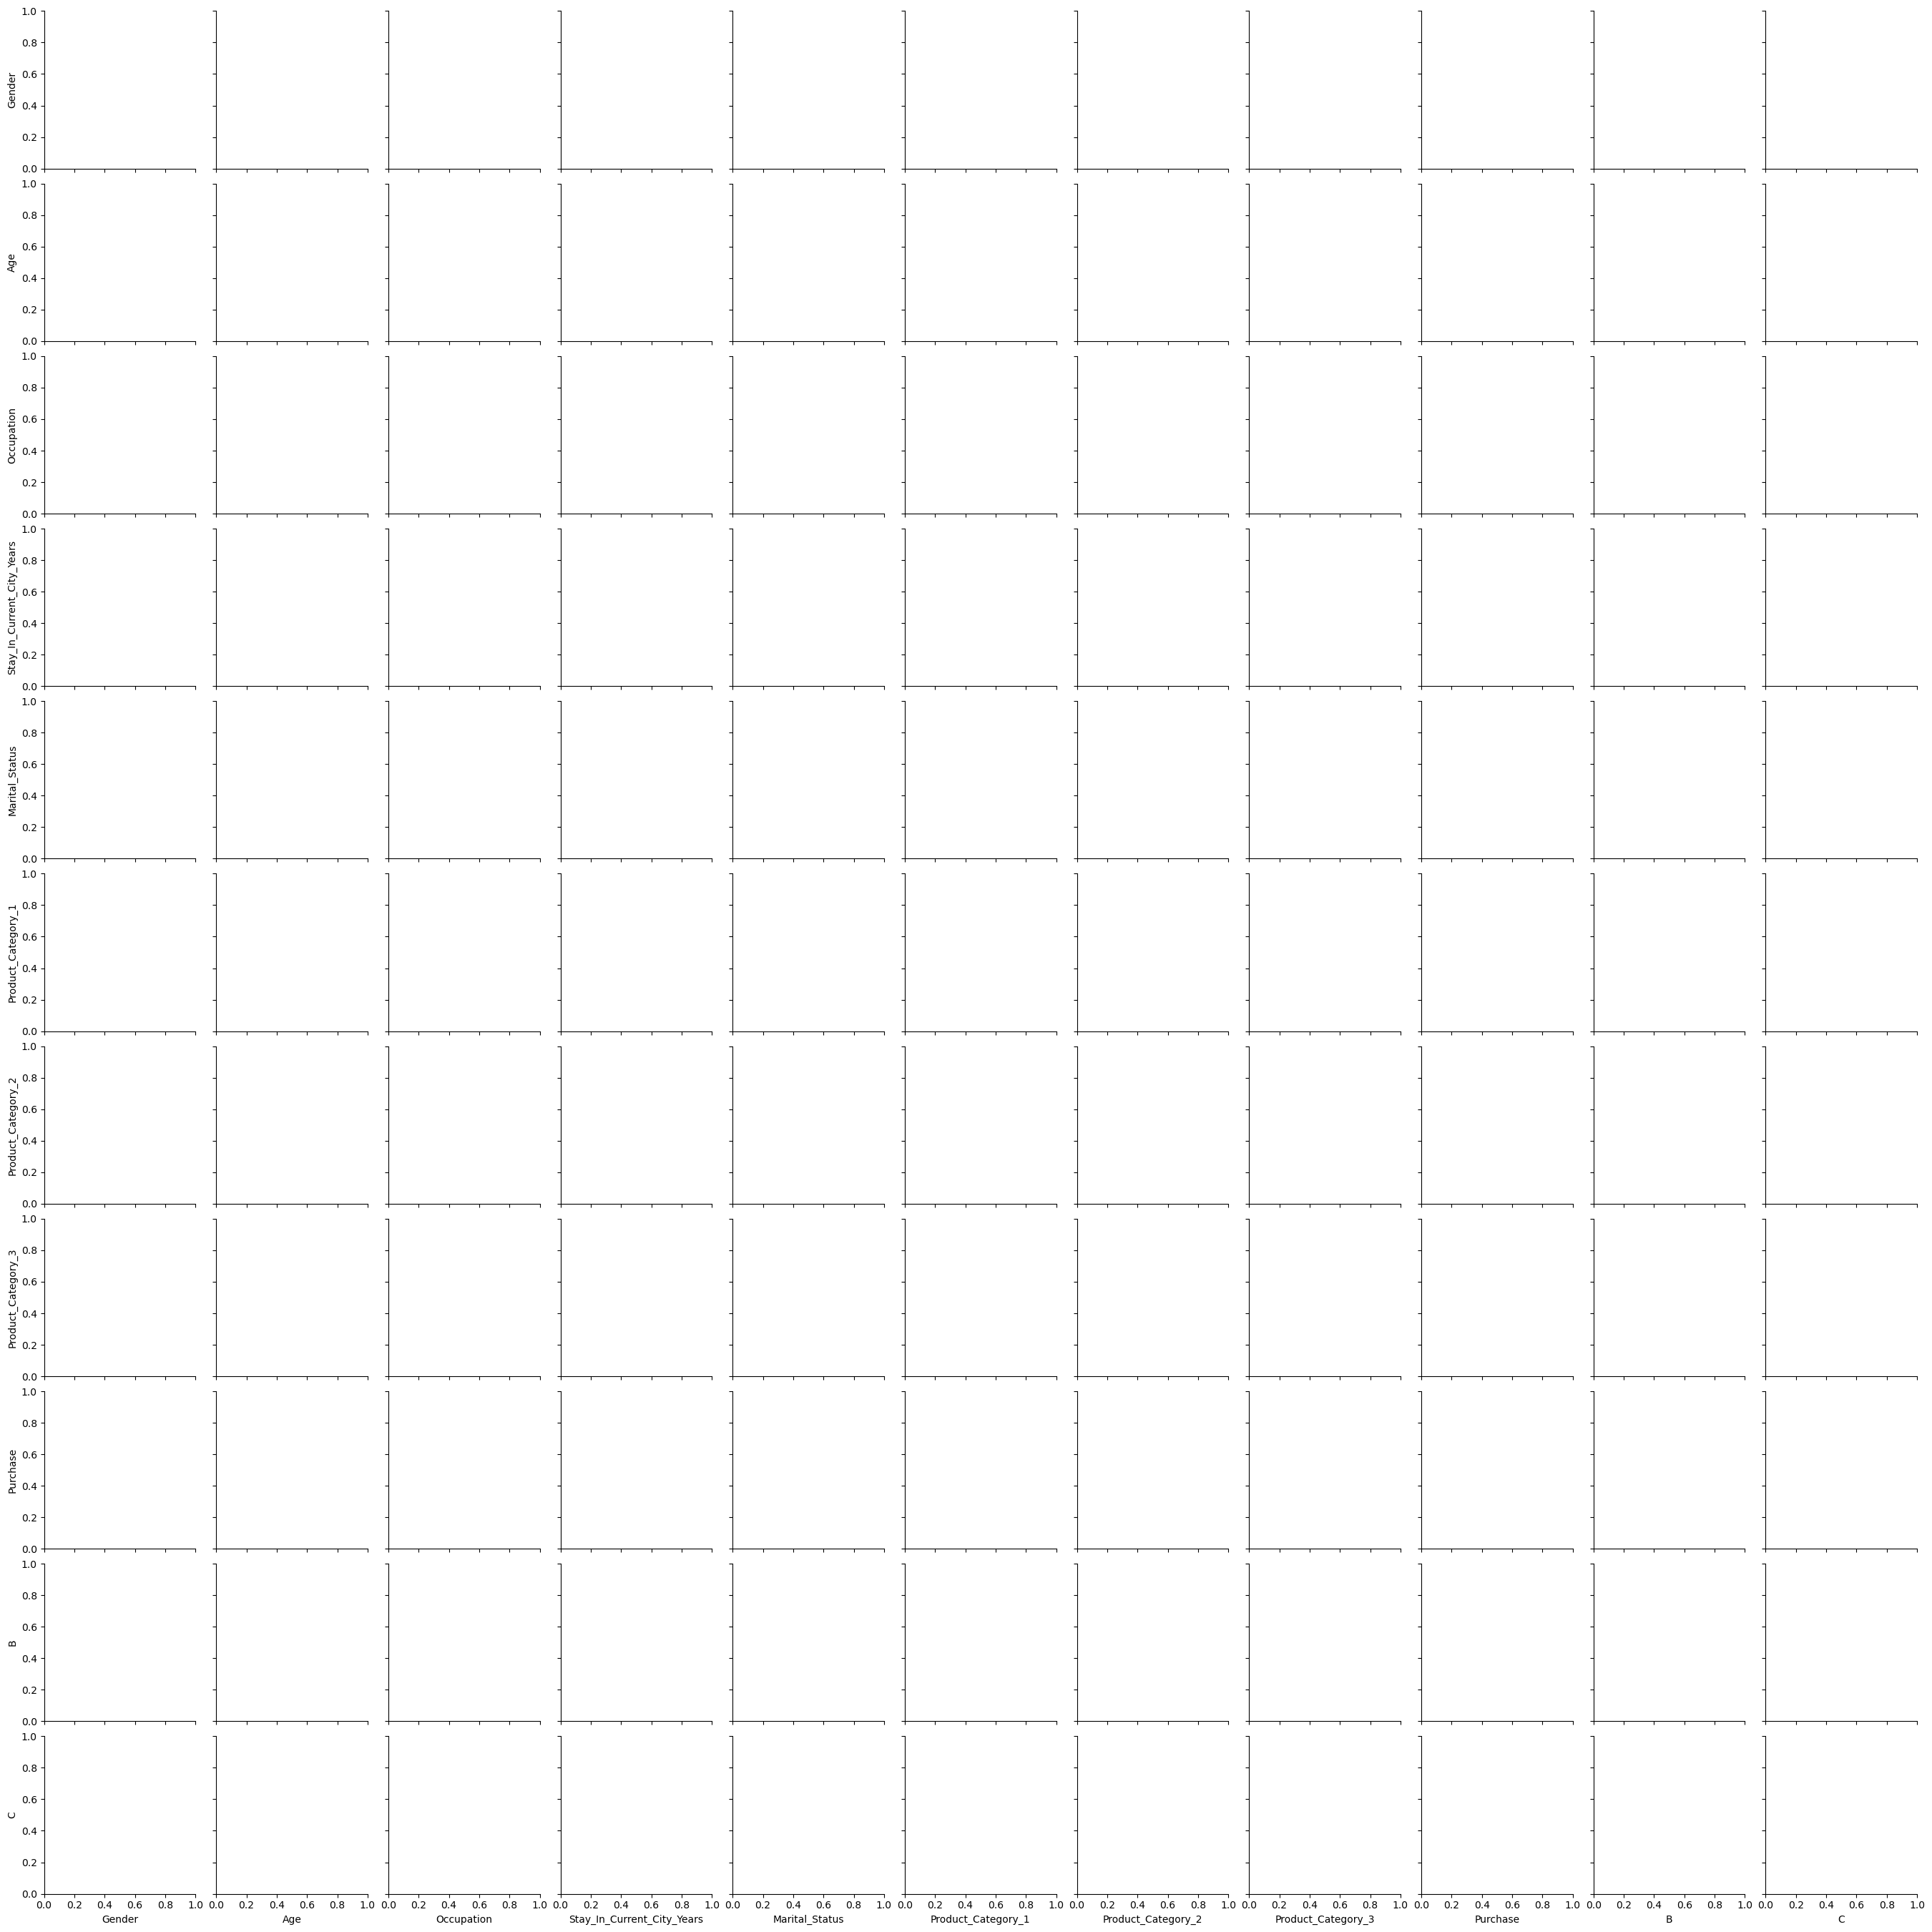

In [33]:
sns.pairplot(df)